In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

# DATA

In [2]:
(mnist_train, mnist_test), ds_info = tfds.load('mnist',split=['train', 'test'],as_supervised=True,with_info=True)

In [3]:
mnist_builder = tfds.builder("mnist")
mnist_info = mnist_builder.info

num_validation_samples=0.1* mnist_info.splits['train'].num_examples
num_validation_samples=tf.cast(num_validation_samples,tf.int64)

num_test_samples= mnist_info.splits['train'].num_examples
num_test_samples=tf.cast(num_test_samples,tf.int64)

print(num_validation_samples,num_test_samples)

tf.Tensor(6000, shape=(), dtype=int64) tf.Tensor(60000, shape=(), dtype=int64)


In [4]:
def scale(image,label):
    image=tf.cast(image,tf.float32)
    image/=255.
    return image,label

In [5]:
scaled_train_and_validation_data=mnist_train.map(scale)
scaled_train_and_validation_data = scaled_train_and_validation_data.cache()

BUFFER_SIZE=10000
shuffled_train_and_validation_data=scaled_train_and_validation_data.shuffle(BUFFER_SIZE)

validation_data=shuffled_train_and_validation_data.take(num_validation_samples)
train_data=shuffled_train_and_validation_data.skip(num_validation_samples)

BATCH_SIZE=100
train_data=train_data.batch(BATCH_SIZE)
validation_data=validation_data.batch(num_validation_samples)

train_data = train_data.prefetch(tf.data.AUTOTUNE)
validation_data = validation_data.prefetch(tf.data.AUTOTUNE)

In [6]:
test_data=mnist_test.map(scale)
test_data=test_data.batch(num_test_samples)

In [7]:
validation_inputs,validation_targets=next(iter(validation_data))

# MODEL

In [8]:
input_size=784
output_size=10
hidden_layer_size=50

In [9]:
model=tf.keras.Sequential([
                                                tf.keras.layers.Flatten(input_shape=(28,28,1)),
                                                tf.keras.layers.Dense(hidden_layer_size,activation='relu'),   
                                                tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                                                tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                                                tf.keras.layers.Dense(hidden_layer_size,activation='relu'),
                                                tf.keras.layers.Dense(output_size,activation='softmax')
                                              ])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])


# TRAINING

In [10]:
early_stopping=tf.keras.callbacks.EarlyStopping(patience=2)

model.fit(train_data,epochs=10,callbacks=[early_stopping],validation_data=(validation_inputs,validation_targets),verbose=2)

Epoch 1/10
540/540 - 2s - loss: 0.4358 - sparse_categorical_accuracy: 0.8682 - val_loss: 0.2108 - val_sparse_categorical_accuracy: 0.9392 - 2s/epoch - 4ms/step
Epoch 2/10
540/540 - 1s - loss: 0.1699 - sparse_categorical_accuracy: 0.9490 - val_loss: 0.1401 - val_sparse_categorical_accuracy: 0.9565 - 830ms/epoch - 2ms/step
Epoch 3/10
540/540 - 1s - loss: 0.1294 - sparse_categorical_accuracy: 0.9605 - val_loss: 0.1379 - val_sparse_categorical_accuracy: 0.9613 - 838ms/epoch - 2ms/step
Epoch 4/10
540/540 - 1s - loss: 0.1065 - sparse_categorical_accuracy: 0.9676 - val_loss: 0.1063 - val_sparse_categorical_accuracy: 0.9677 - 826ms/epoch - 2ms/step
Epoch 5/10
540/540 - 1s - loss: 0.0897 - sparse_categorical_accuracy: 0.9724 - val_loss: 0.1084 - val_sparse_categorical_accuracy: 0.9663 - 822ms/epoch - 2ms/step
Epoch 6/10
540/540 - 1s - loss: 0.0801 - sparse_categorical_accuracy: 0.9750 - val_loss: 0.0877 - val_sparse_categorical_accuracy: 0.9720 - 823ms/epoch - 2ms/step
Epoch 7/10
540/540 - 1s -

# TESTING

In [11]:
model.evaluate(test_data)

1/1 [==============================] - 0s 265ms/step - loss: 0.0962 - sparse_categorical_accuracy: 0.9703


[0.09622356295585632, 0.970300018787384]

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 50)                2550      
                                                                 
 dense_4 (Dense)             (None, 10)                510       
                                                                 
Total params: 47,410
Trainable params: 47,410
Non-traina

In [13]:
model.predict(test_data).round(2)

1/1 [==============================] - 0s 214ms/step


array([[0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [14]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_test=x_test/255
x_test

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

313/313 [==============================] - 0s 711us/step
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.] => 7


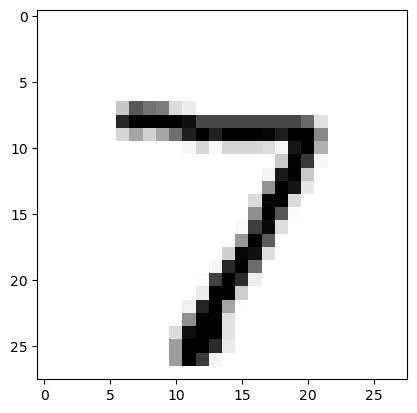

[0.   0.02 0.98 0.   0.   0.   0.   0.   0.   0.  ] => 2


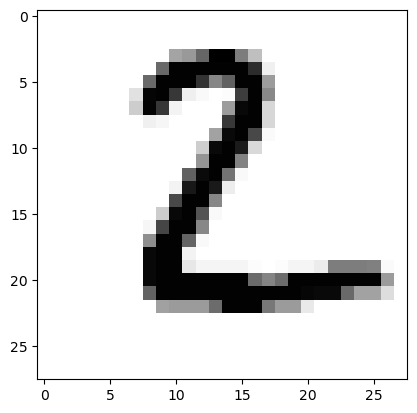

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.] => 1


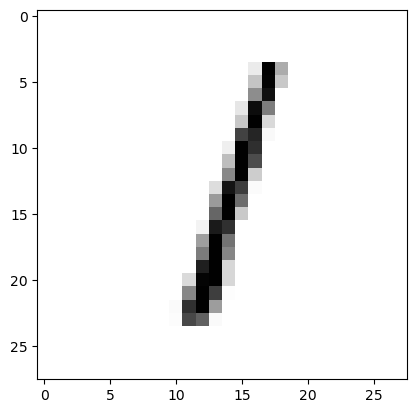

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.] => 0


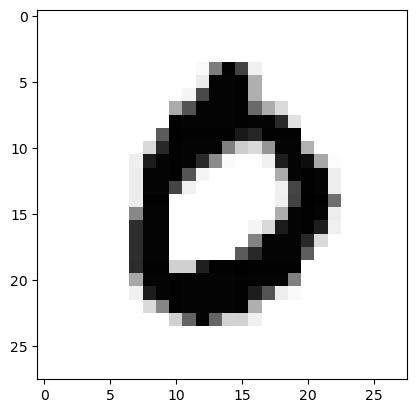

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.] => 4


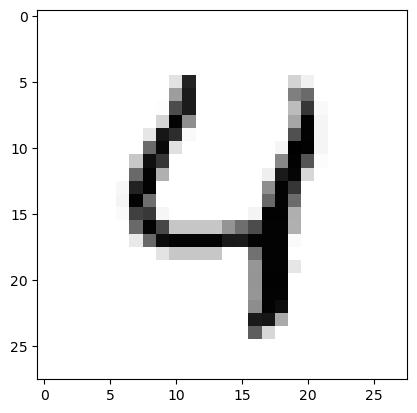

In [15]:
probs=model.predict(x_test).round(2)
preds=np.argmax(probs,axis=1)
for i in range(5):
    print(probs[i],"=>",preds[i])
    plt.imshow(x_test[i],cmap="Greys")
    plt.show()